In [1]:
import os

# Test nii.gz files

In [1]:
pip install nibabel

     ---------------------------------------- 3.3/3.3 MB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [132]:
path = 'D:\\nnUNet_raw\\Dataset001_Liver\\imagesTr\\imagesTr_T2SPIR_501.nii.gz'
img = nib.load(path)
data = img.get_fdata()
hdr = img.header

FileNotFoundError: No such file or no access: 'D:\nnUNet_raw\Dataset001_Liver\imagesTr\imagesTr_T2SPIR_501.nii.gz'

In [133]:
np.where(data != 0)

(array([  0,   0,   0, ..., 319, 319, 319], dtype=int64),
 array([ 72,  73,  74, ..., 250, 251, 251], dtype=int64),
 array([20, 20,  9, ..., 20, 19, 20], dtype=int64))

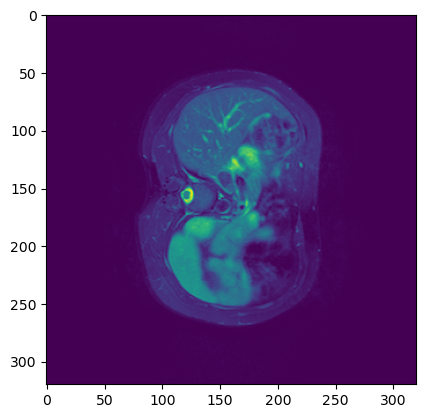

In [139]:
plt.imshow(data[:, :, 20])

In [143]:
label_data.shape

(256, 256, 36)

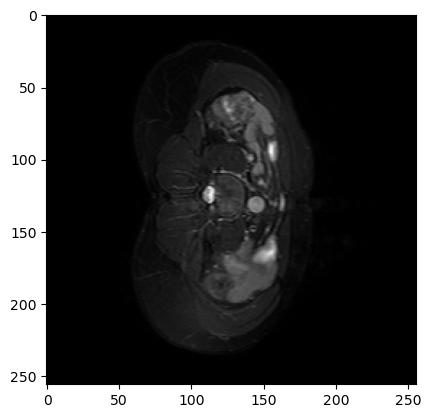

In [142]:
label_path = 'D:\\CHAOS liver dataset\\train\\MR\\1\\T2SPIR\\DICOM_anon\\DICOM_anon_T2SPIR_501.nii.gz'
label_img = nib.load(label_path)
label_data = label_img.get_fdata()
plt.imshow(label_data[:,:,np.where(label_data != 0)[2][0]], cmap='gray')

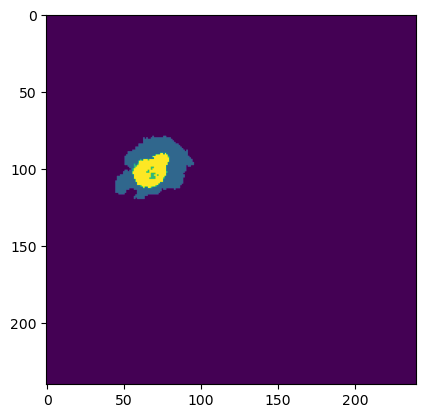

In [98]:
label_path = '../Medical Decathlon\\Task01_BrainTumour\\labelsTr\\BRATS_002.nii.gz'
label_img = nib.load(label_path)
label_data = label_img.get_fdata()
plt.imshow(label_data[:,:,86])

In [92]:
np.where(label_data == 3)

(array([ 81,  81,  81, ..., 112, 112, 112], dtype=int64),
 array([69, 69, 70, ..., 67, 67, 68], dtype=int64),
 array([113, 114, 114, ...,  85,  86,  84], dtype=int64))

# Convert .png to NIFTI on LABELS

In [1]:
import cv2
import os
import numpy as np

## Test single image

In [43]:
path = 'D:\\nnUnet_dataset\\train\\t2\\2\\T2SPIR\\Ground\\IMG-0007-00023.png'
img = cv2.imread(path, 0)
img.max()

63

In [44]:
img.shape

(320, 320)

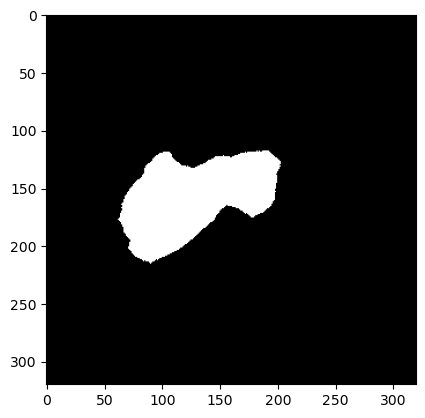

In [ ]:
plt.imshow(img, cmap='gray')

## Test series images

In [118]:
def only_liver_labeled(data):
    data = data.astype(dtype=int)
    new_seg = np.zeros(data.shape, data.dtype)
    new_seg[(data > 55) & (data <= 70)] = 1
    return new_seg

In [121]:
def png2nii(path):
    #convert .png files to .nii.gz
    imgs_path = [os.path.join(path, i) for i in os.listdir(path)]
    
    first_img = cv2.imread(imgs_path[0], 0)
    
    nii_array = np.empty([first_img.shape[0], first_img.shape[1] ,len(imgs_path)], dtype=int)

    for i in range(len(imgs_path)):
        img = cv2.imread(imgs_path[i], 0)
        
        liver_labeled_img = only_liver_labeled(img)
        
        nii_array[:,:,i] = liver_labeled_img
    
    return nii_array

In [122]:
nii_array = png2nii('D:\\nnUnet_dataset\\train\\t2\\2\\T2SPIR\\Ground')
nii_file = nib.Nifti1Image(nii_array, None)
nib.save(nii_file, 'D:\\nii_labels\\train\\xxx.nii.gz')

In [123]:
label_img = nib.load('D:\\nii_labels\\tra`in\\xxx.nii.gz')
label_data = label_img.get_fdata()

In [124]:
np.where(label_data != 0)[2]
# label_data[:,:,35][np.where(label_data[:,:,35] != 0)]

array([16, 16, 16, ..., 15, 16, 15], dtype=int64)

(-0.5, 319.5, 319.5, -0.5)

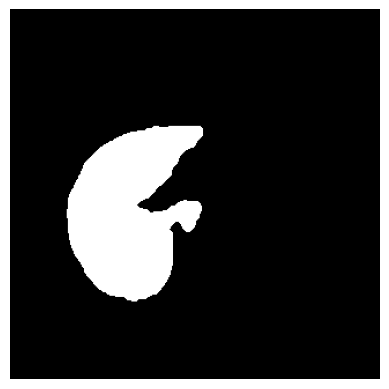

In [135]:
plt.imshow(label_data[:,:,16], cmap='gray')
plt.axis(False)

## Test multiple patients

**Training set**

In [226]:
src_path = 'D:\\nnUnet_dataset\\train\\t2'

patient_names = os.listdir(src_path)

label_paths = list(map(os.path.join, [src_path]*len(patient_names), patient_names, ['T2SPIR\\Ground']*len(patient_names)))

In [227]:
affine = np.eye(4)

for i, label_path in enumerate(label_paths):
    nii_array = png2nii(label_path)
    
    nii_file = nib.Nifti1Image(nii_array, affine)
    
    nib.save(nii_file, f'D:\\nii_labels\\train\\{patient_names[i]}.nii.gz')

**Testing set** (same)<br>
But of course we don't have labels on test sets :)

In [81]:
# src_path = 'D:\\nnUnet_dataset\\test\\t2'

# patient_names = os.listdir(src_path)

# label_paths = list(map(os.path.join, [src_path]*len(patient_names), patient_names, ['T2SPIR\\Ground']*len(patient_names)))

# for i, label_path in enumerate(label_paths):
#     nii_array = png2nii(label_path)
    
#     nii_file = nib.Nifti1Image(nii_array, None)
    
#     nib.save(nii_file, f'D:\\nii_labels\\train\\{patient_names[i]}.nii.gz')

# Rename in `_0000.nii.gz` format

In [92]:
def re_name(path):
    new_path = path.replace('.nii', '_0000.nii')
    return os.rename(path, new_path)

In [93]:
src_path = 'D:\\nnUNet_raw\\Dataset001_Liver\\imagesTr'
patient_paths = [os.path.join(src_path, i) for i in os.listdir(src_path)]

list(map(re_name, patient_paths))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [96]:
len(os.listdir('D:\\nnUNet_raw\\Dataset001_Liver\\imagesTr'))

20

# Liver-tumor Label assignment

In [97]:
import SimpleITK as sitk

In [98]:
path = 'D:\\nnUnet_dataset\\train\\t2\\2\\T2SPIR\\Ground\\IMG-0007-00023.png'
img = sitk.ReadImage(path)
img = sitk.GetArrayFromImage(img)

In [100]:
cv_img = cv2.imread(path, 0)
cv_img.shape

(320, 320)

In [101]:
np.array_equal(img, cv_img)

True

**Conclusion**: can use `cv2.imread(path, 0)` instead of `sitk`

In [111]:
def only_liver_labeled(data):
    data = data.astype(dtype=int)
    new_seg = np.zeros(data.shape, data.dtype)
    new_seg[(data > 55) & (data <= 70)] = 1
    return new_seg

In [119]:
liver_label = only_liver_labeled(cv_img)

(-0.5, 319.5, 319.5, -0.5)

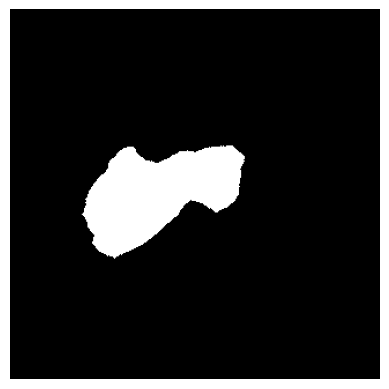

In [120]:
plt.imshow(liver_label, cmap='gray') # by default, the colormap covers the complete value range of the supplied data.
                                     # now the range is [0, 1]
plt.axis(False)

# Convert `.dcm` to `NIFTI` on DATA

In [149]:
def raw_preprocess(data, get_s=False):
    """
    :param data: [155,224,224]
    :return:
    """
    data = data.astype(dtype=float)
    data[data<50] = 0
    out = data.copy()
    out = (out - out.min()) / (out.max() - out.min())

    if get_s:
        share_mask = out.copy()
        share_mask[share_mask != 0] = 1
        return out, share_mask
    return out

In [269]:
def png2nii_images(path):
    #convert .png files to .nii.gz on images 
    imgs_path = [os.path.join(path, i) for i in os.listdir(path)]
    
    first_img = sitk.ReadImage(imgs_path[0])
    first_img = sitk.GetArrayFromImage(first_img)[0]
    
    nii_array = np.empty([first_img.shape[0], first_img.shape[1], len(imgs_path)], dtype=float)

    for i, img_path in enumerate(imgs_path):
        img = sitk.ReadImage(img_path)
        img = sitk.GetArrayFromImage(img)[0]
        
        preprocessed_img = raw_preprocess(img)
                
        nii_array[:,:,i] = preprocessed_img
    
    return nii_array

In [270]:
src_path = 'D:\\nnUnet_dataset\\train\\t2'

patient_names = os.listdir(src_path)

image_paths = list(map(os.path.join, [src_path]*len(patient_names), patient_names, ['T2SPIR\\DICOM_anon']*len(patient_names)))

In [271]:
affine = np.eye(4)

for i, image_path in enumerate(image_paths):
    nii_array = png2nii_images(image_path)
    
    nii_file = nib.Nifti1Image(nii_array, affine)
    
    nib.save(nii_file, f'D:\\nnUNet_raw\\Dataset001_Liver\\imagesTr\\{patient_names[i]}_0000.nii.gz')

# Test nnUNet's predictions

In [9]:
import SimpleITK as sitk
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
os.getcwd()

'D:\\nnUnet_dataset'

In [25]:
img = nib.load("C:\\Users\\Acer\\Dropbox\\My PC (LAPTOP-977VRJV6)\\Downloads\\Bản sao của 2.nii.gz").get_fdata()

In [28]:
np.where(img != 0)[2]

array([14, 14, 14, ..., 15, 15, 15], dtype=int64)

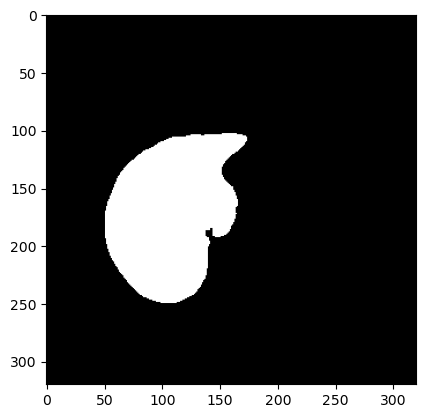

In [32]:
plt.imshow(img[:,:,17], cmap='gray')

**Test `sitk.ReadImage`** (Can be deleted)

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [18]:
path = 'D:\\CHAOS_preprocessed\\train\\t2\\2\\DICOM_anon\\IMG-0007-00001.dcm'

img = sitk.ReadImage(path)
img = sitk.GetArrayFromImage(img)

In [19]:
img.shape

(1, 320, 320)

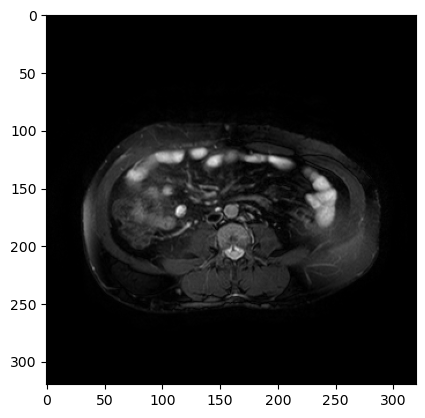

In [20]:
plt.imshow(img.transpose(1,2,0), cmap='gray')

In [11]:
path = 'D:\\CHAOS_preprocessed\\train\\ct\\1\\DICOM_anon\\i0000,0000b.dcm'

img = sitk.ReadImage(path)
img = sitk.GetArrayFromImage(img)

In [14]:
img.min()

-1166

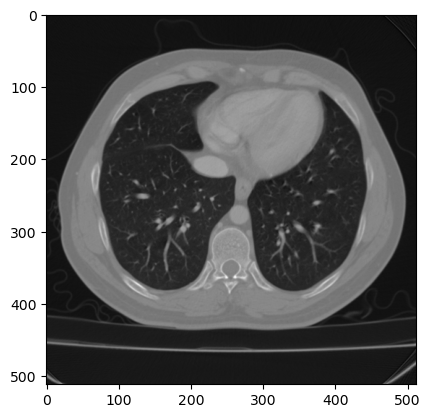

In [17]:
plt.imshow(img.transpose(1, 2, 0), cmap='gray')